In [260]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
N = 500
def load_data():
    x_train = np.random.randn(N, 2)
    y_train = (x_train[:, 0] * x_train[:, 1] >= 0) * 2 - 1
    return x_train, y_train

In [262]:
def least_squares(A, b, factor=1.0):
    return np.linalg.inv(A.T @ A) @ (A.T @ b)

In [263]:
# calculate the matrix A
def find_coeff_matrix(x_train):
    A = np.empty((x_train.shape[0], 6))
    A[:,0] = 1
    A[:,1:3] = x_train
    A[:,3] = x_train[:,0] * x_train[:,1]
    A[:,4:6] = x_train**2
    return A

In [264]:
def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for i in range(len(y_pred)):
        x = labels.index(y_true[i])
        y = labels.index(y_pred[i])
        matrix[x, y] += 1
    return matrix

In [265]:
x_train, y_train = load_data()
A = find_coeff_matrix(x_train)
x_hat = least_squares(A, y_train)
y_pred = A @ x_hat
y_pred = np.sign(y_pred).astype(np.int32)

err_rate = np.mean(y_pred != y_train)
print(f'Error Rate: {err_rate * 100:.4f}%\n')

Error Rate: 5.6000%



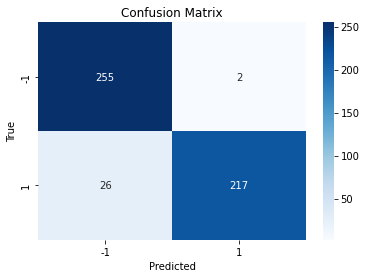

In [266]:
cnf_mat = confusion_matrix(y_train, y_pred, labels=[-1, 1])
sns.heatmap(cnf_mat, xticklabels=
        ['-1', '1'], yticklabels=['-1', '1'], annot=True, cmap = 'Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [267]:
def display_scatter_plot(x, y, title):
    fig, ax = plt.subplots()
    ax.scatter(x[:,0], x[:,1], c=y, s=10, cmap='coolwarm')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    plt.show()

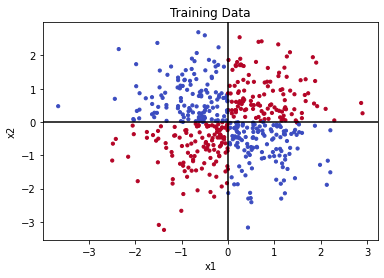

In [268]:
# plotting the training data as it is
display_scatter_plot(x_train, y_train, 'Training Data')

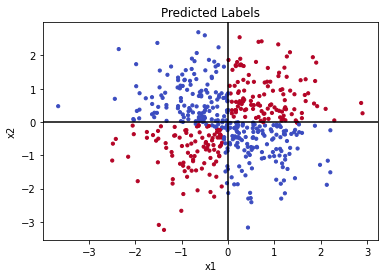

In [269]:
# plotting the predicted labels
display_scatter_plot(x_train, y_pred, 'Predicted Labels')

In [270]:
# Create a test set and test the model on it
test_pts = 100000
x_test = np.random.randn(test_pts, 2)
y_test = (x_test[:, 0] * x_test[:, 1] >= 0) * 2 - 1
A_test = find_coeff_matrix(x_test)
y_hat = A_test @ x_hat
y_hat = np.sign(y_hat).astype(np.int32)

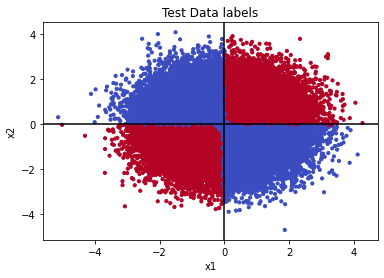

In [271]:
# plotting the test set labels
display_scatter_plot(x_test, y_hat, 'Test Data labels')

In [272]:
print(x_hat)

[-0.01742263  0.0294122   0.01539744  0.6397916   0.00439876 -0.0037246 ]
